<a href="https://colab.research.google.com/github/antoinebachand/Derivatives-and-risk-management/blob/main/VaR_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The objective of this file is to measure the Value at Risk (VaR) and the Expected Shortfall (ES) of a Monte Carlo simulation. 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_excel('Monte_Carlo.xlsx', header=0, index_col=False, keep_default_na=True)

In [17]:
df.head()

,NPV ($)
0,-1.388247e+07
1,-8.970778e+06
2,-1.174629e+07
3,4.616915e+07
4,-5.214710e+07


In [70]:
# Now we will produce the P(-) and L(+) vector (The loss will become positive and profit negative)
df['Losses ($)'] = df['NPV ($)']*(-1)
df.head()

,NPV ($),Losses ($)
0,-1.388247e+07,1.388247e+07
1,-8.970778e+06,8.970778e+06
2,-1.174629e+07,1.174629e+07
3,4.616915e+07,-4.616915e+07
4,-5.214710e+07,5.214710e+07


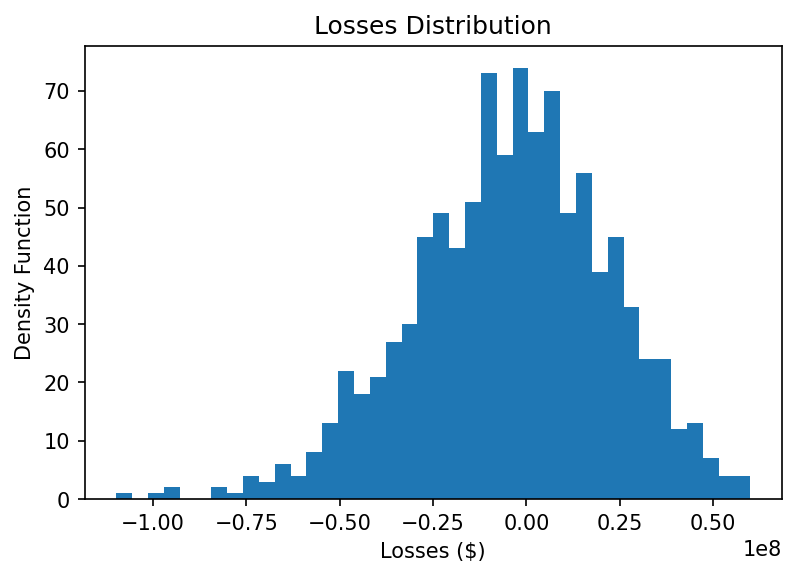

In [71]:
# Now Lets plot the Losses 


plt.rcParams['figure.dpi'] = 150
plt.hist(df['Losses ($)'], bins = 40)
plt.ylabel("Density Function")
plt.xlabel("Losses ($)")
plt.title('Losses Distribution')
plt.show()

In [72]:
# Now Lets Measure the VaR at 90%, 95%, 99%, 99.5%
from scipy.stats import norm

# First we make the value in Millions
df['Losses ($)'] =df['Losses ($)']/1000000

# We assume a Normal distribution
VaR_90 = norm.ppf(0.9, df['Losses ($)'].mean(), np.std(df['Losses ($)']))
VaR_95 = norm.ppf(0.95, df['Losses ($)'].mean(), np.std(df['Losses ($)']))
VaR_99 = norm.ppf(0.99, df['Losses ($)'].mean(), np.std(df['Losses ($)']))
VaR = [VaR_90, VaR_95, VaR_99]

# Now for ES we will use the discrete distribution
# ES is a coherent risk Measure

df_90 = df.nsmallest(100, 'NPV ($)')
df_95 = df.nsmallest(50, 'NPV ($)')
df_99 = df.nsmallest(10, 'NPV ($)')

ES_90 = df_90['Losses ($)'].mean()
ES_95 = df_95['Losses ($)'].mean()
ES_99 = df_99['Losses ($)'].mean()
ES = [ES_90, ES_95, ES_99]

# Now Lests build the table
Alpha = [0.9,0.95,0.99]
table = pd.DataFrame({'Alpha':Alpha,"VaR (Millions $)": VaR, "ES (Millions $)": ES})

display(table)

,Alpha,VaR (Millions $),ES (Millions $)
0,0.90,29.511759,38.654116
1,0.95,39.082011,44.760120
2,0.99,57.034210,54.959183
